### Machine Learning Algorithm
- 지도 학습 Supervised Learning
- 비지도 학습 Unsupervised Learning
- 강화 학습 Reinforcement Learning (실습X)

지도 학습 Supervised Learning

#### k-NN(K-Nearest Neighbor)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # classifier: 분류기

$$
    \begin{pmatrix}
    1 & 2\\
    2 & 3\\
    3 & 4\\
    6 & 7\\
    7 & 8\\
    8 & 9\\
    \end{pmatrix}
$$

In [3]:
# 모델 훈련용 데이터
x_train = np.array([[i, i+1]for i in range(1,9) if i not in (4,5)])
y_train = np.array([0,0,0,1,1,1])

In [4]:
# 모델 테스트용 데이터
x_test = np.array([[6,5]])

In [5]:
# K-NN setting
K = 3
knn = KNeighborsClassifier(n_neighbors=K) # K값만큼 분류
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Test
predicted_label = knn.predict(x_test)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_4612\1488778506.py:16: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contour(xx,yy,z,alpha=0.3, camp=plt.cm.coolwarm)


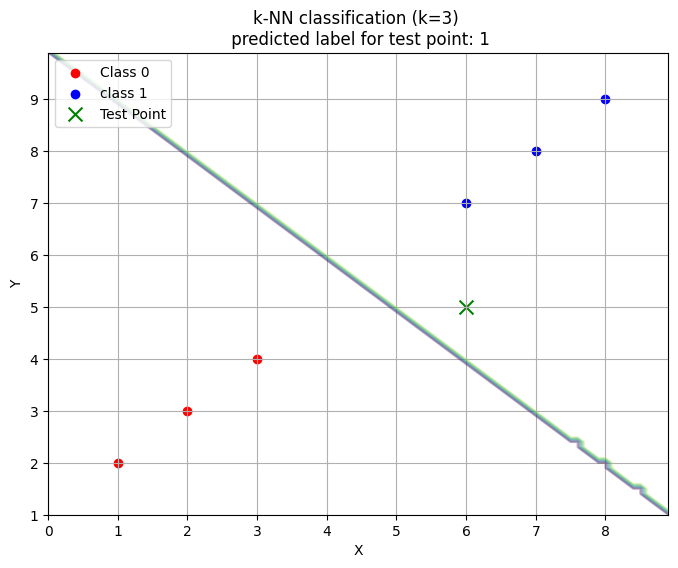

In [7]:
# 시각화
plt.figure(figsize=(8,6))
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i]==0 and i==0 else ('class 1' if y_train[i]==1 and i==3 else ''))
    
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:, 0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx,yy,z,alpha=0.3, camp=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"k-NN classification (k={K}) \n predicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

SVM(Support Vector Machine) - 분류

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [9]:
# 복잡한 샘플 생성 
x_train, y_train = make_blobs(n_samples=100, centers=2, random_state=3, cluster_std=2) 

# 테스트 데이터
x_test = np.array([[0,0]])

In [10]:
# 모델 생성
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [11]:
# 예측
predicted_label = svm_model.predict(x_test)

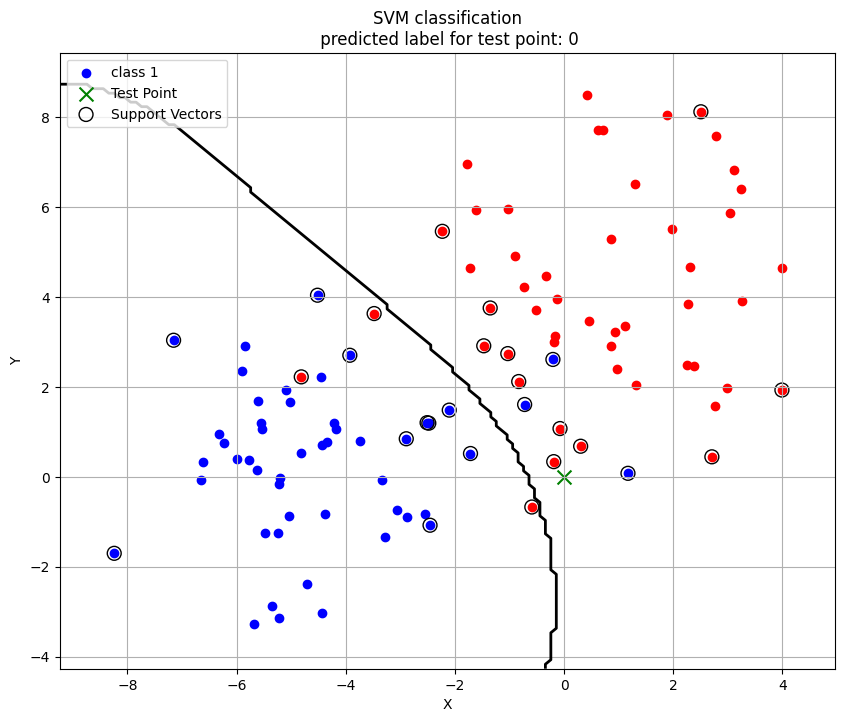

In [12]:
# 시각화
plt.figure(figsize=(10,8))
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i]==0 and i==0 else ('class 1' if y_train[i]==1 and i==1 else ''))
    
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:, 0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx,yy,z,levels=[0],linewidths=2, colors='k')

# 서프트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k',
            label="Support Vectors")

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM classification\n predicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

In [13]:
# scatter visualizaion function 
def scatter_vis(x_train, y_train, x_test, model, figsize=(6,6)):
    '''_Summary_
    Args:
        x_train (_type_): 훈련 데이터 셋
        y_train (_type_): 훈련 데이터 레이블
        x_test (_type_): 테스트용 데이터
        model (_type_): 만든 머신러닝 모델 작성
        figsize (tuple, optional): Defaults to (6,6)
    '''
    plt.figure(figsize=(10,8))
    for i, point in enumerate(x_train):
        plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                    label='Class 0' if y_train[i]==0 and i==0 else ('class 1' if y_train[i]==1 and i==1 else ''))
        
    plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

    x_min, x_max = x_train[:, 0].min()-1, x_train[:,0].max()+1
    y_min, y_max = x_train[:, 1].min()-1, x_train[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    return xx, yy, z

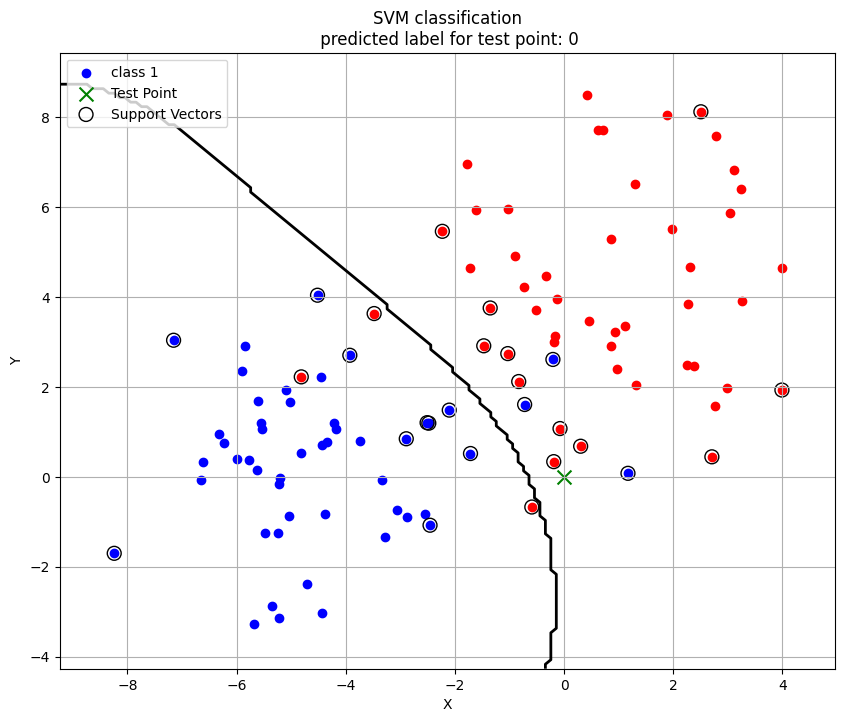

In [14]:
scatter_vis(x_train, y_train, x_test, svm_model, figsize=(10,8))
plt.contour(xx,yy,z,levels=[0],linewidths=2, colors='k')

# 서프트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k',
            label="Support Vectors")

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM classification\n predicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

### Decision Tree

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [16]:
# 복잡한 샘플 데이터 생성
x_train, y_train = make_classification(n_samples=200, n_features= 2, n_informative=2, n_redundant=0,
                                       n_clusters_per_class=1, random_state=42)

# 테스트 데이터
x_test = np.array([[0,0]])

In [17]:
# DC tree 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# 예측
predicted_label = tree_model.predict(x_test)

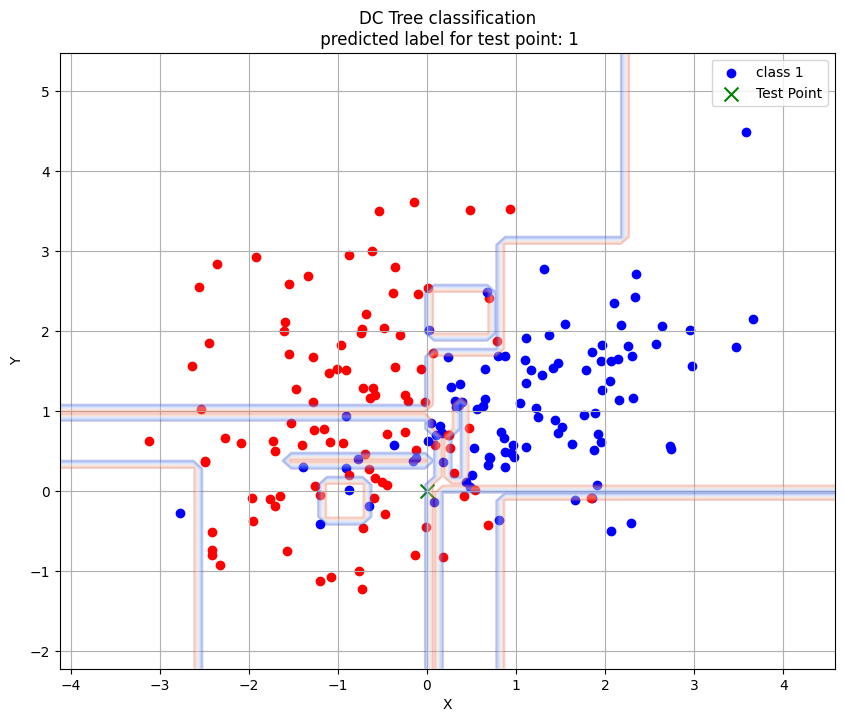

In [19]:
# 시각화
plt.figure(figsize=(10,8))
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i]==0 and i==0 else ('class 1' if y_train[i]==1 and i==1 else ''))
    
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:, 0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt. contour(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"DC Tree classification\n predicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

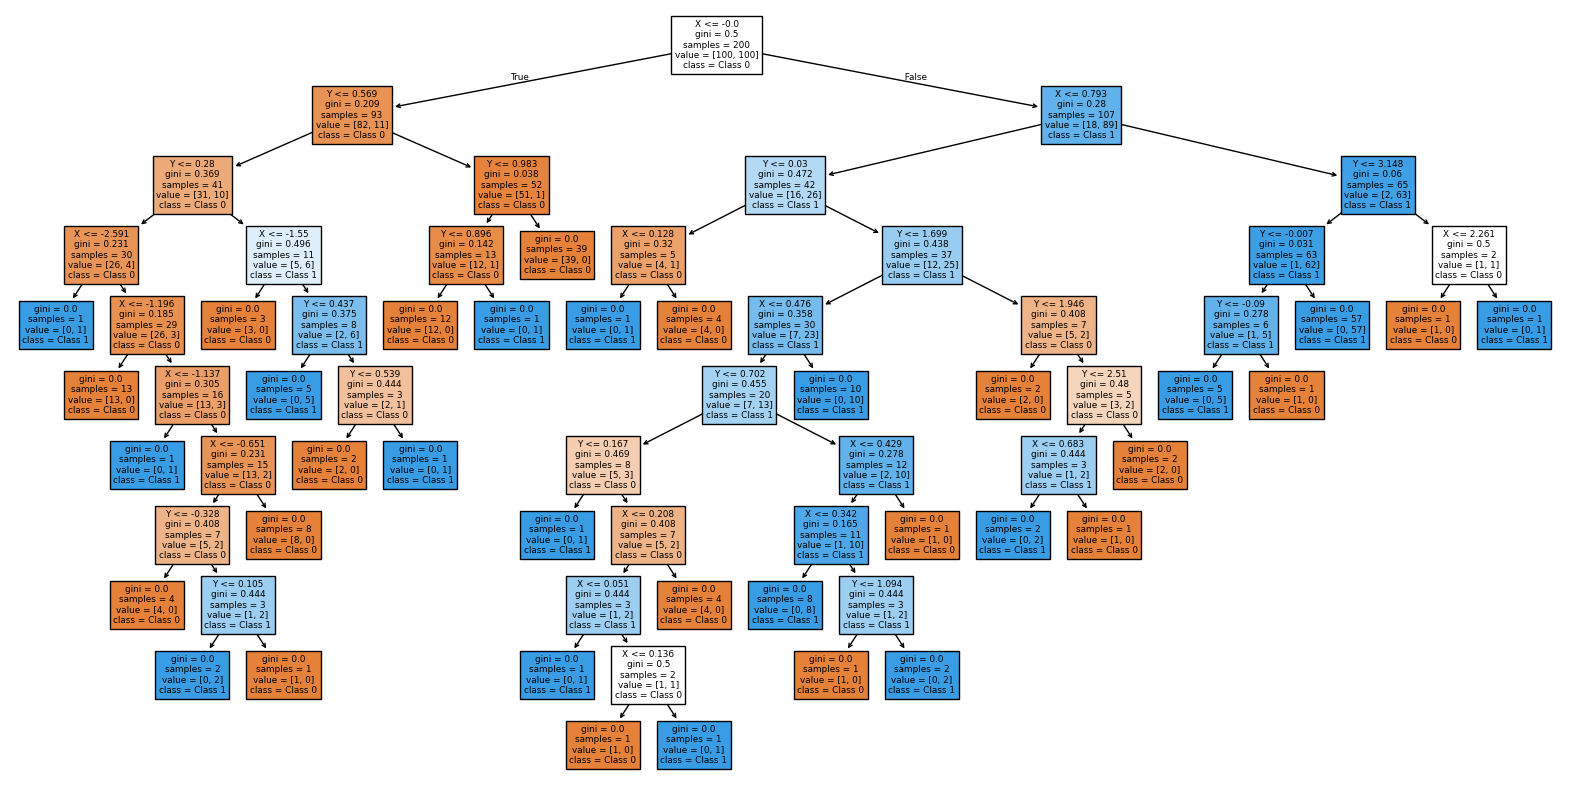

In [20]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=['X', 'Y'], class_names=['Class 0', 'Class 1'])
plt.show()

### 비지도 학습 (Unsupervised Learning)

#### k-means clustering
- k: 군집(클러스터)의 개수

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [22]:
# 데이터 불러오기
iris = load_iris()
x = iris.data

In [23]:
# 데이터 전처리 - 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
# 모델 생성
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [25]:
labels = kmeans.labels_ # label X, cluster값 반환

In [26]:
# PCA(Principle Component Analysis, 주성분분석)
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분만 뽑아서 분석 (메모리 절약)
x_pca = pca.fit_transform(x_scaled)

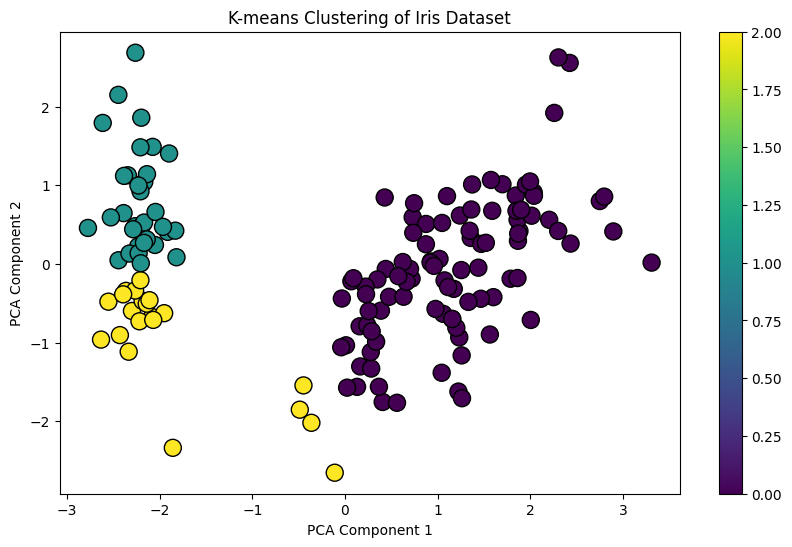

In [27]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis', edgecolors='k', s=150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [28]:
# Random data로 k-means clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

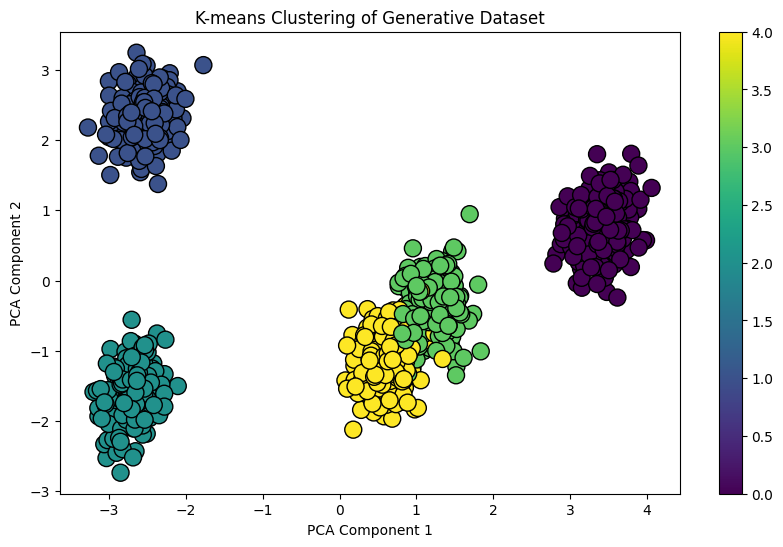

In [30]:
# 파라미터 설정 및 데이터 생성
n_samples = 1000
n_features = 10
n_clusters = 5

x, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_scaled)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2) #2차원
x_pca = pca.fit_transform(x_scaled)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis', edgecolors='k', s=150)
plt.title('K-means Clustering of Generative Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()